# Homework 1

In [1]:
# These are standard python modules
import json, time, urllib.parse, csv, pandas

# The 'requests' module is not a standard Python module. You will need to install this with pip/pip3
import requests

In [2]:
# This is just a list of English Wikipedia article titles that we can use for example requests
ARTICLE_TITLES = []

with open('dinosaur_articles.csv', newline='') as dinosaur_articles:
    reader = csv.reader(dinosaur_articles, delimiter=',')
    headings = next(reader)
    for row in reader:
        ARTICLE_TITLES.append(row[0])

The example relies on some constants that help make the code a bit more readable.

In [3]:
# CONSTANTS
# The REST API 'pageviews' URL - this is the common URL/endpoint for all 'pageviews' API requests
API_REQUEST_PAGEVIEWS_ENDPOINT = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'

# This is a parameterized string that specifies what kind of pageviews request we are going to make
# In this case it will be a 'per-article' based request. The string is a format string so that we can
# replace each parameter with an appropriate value before making the request
API_REQUEST_PER_ARTICLE_PARAMS = 'per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'

# The Pageviews API asks that we not exceed 100 requests per second, we add a small delay to each request
API_LATENCY_ASSUMED = 0.002  # Assuming roughly 2ms latency on the API and network
API_THROTTLE_WAIT = (1.0 / 100.0) - API_LATENCY_ASSUMED

# When making a request to the Wikimedia API they ask that you include a "unique ID" that will allow them to
# contact you if something happens - such as - your code exceeding request limits - or some other error happens
REQUEST_HEADERS = {
    'User-Agent': '<uwnetid@uw.edu>, University of Washington, MSDS DATA 512 - AUTUMN 2022',
}

# This template is used to map parameter values into the API_REQUST_PER_ARTICLE_PARAMS portion of an API request. The
# dictionary has a field/key for each of the required parameters. In the example, below, we only vary the article
# name, so the majority of the fields can stay constant for each request. Of course, these values *could* be changed
# if necessary.
ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE = {
    "project": "en.wikipedia.org",
    "access": "desktop",  # this should be changed for the different access types
    "agent": "user",
    "article": "",  # this value will be set/changed before each request
    "granularity": "monthly",
    "start": "2015010100",
    "end": "2022093000"
}

The API request will be made using one procedure. The idea is to make this reusable. The procedure is parameterized, but relies on the constants above for the important parameters. The underlying assumption is that this will be used to request data for a set of article pages. Therefore the parameter most likely to change is the article_title.

In [4]:
# PROCEDURES/FUNCTIONS

def request_pageviews_per_article(
        article_title=None,
        access=None,
        endpoint_url=API_REQUEST_PAGEVIEWS_ENDPOINT,
        endpoint_params=API_REQUEST_PER_ARTICLE_PARAMS,
        request_template=ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE,
        headers=REQUEST_HEADERS
):
    # Make sure we have an article title
    if not article_title:
        return None

    # Make sure we have an access type
    if not access:
        return None

    # Titles are supposed to have spaces replaced with "_" and be URL encoded
    article_title_encoded = urllib.parse.quote(article_title.replace(' ', '_'))
    request_template['article'] = article_title_encoded
    request_template['access'] = access

    # now, create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url + endpoint_params.format(**request_template)

    # make the request
    try:
        # we'll wait first, to make sure we don't exceed the limit in the situation where an exception
        # occurs during the request processing - throttling is always a good practice with a free
        # data source like Wikipedia - or other community sources
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response


def download_pageviews_for_all_articles(access=None):
    pageviews_data = []

    for article_title in ARTICLE_TITLES:
        print("Getting pageview data for: ", article_title)
        pageviews = request_pageviews_per_article(article_title, access)

        for item in pageviews['items']:
            del item["access"]  # delete the 'access' field since it will be confusing for mobile/cumulative
            pageviews_data.append(item)

    return pageviews_data

In [5]:
# Download desktop pageviews for all articles to json file
desktop_pageviews_data = []
for desktop_pageviews in download_pageviews_for_all_articles('desktop'):
    desktop_pageviews_data.append(desktop_pageviews)
with open('dino_monthly_desktop_201501-202209.json', 'w') as f:
    json.dump(desktop_pageviews_data, f)

Getting pageview data for:  Aachenosaurus
Getting pageview data for:  Aardonyx
Getting pageview data for:  Abdarainurus
Getting pageview data for:  Abditosaurus
Getting pageview data for:  Abelisaurus
Getting pageview data for:  Abrictosaurus
Getting pageview data for:  Abrosaurus
Getting pageview data for:  Abydosaurus
Getting pageview data for:  Acantholipan
Getting pageview data for:  Acanthopholis
Getting pageview data for:  Achelousaurus
Getting pageview data for:  Acheroraptor
Getting pageview data for:  Achillesaurus
Getting pageview data for:  Achillobator
Getting pageview data for:  Acristavus
Getting pageview data for:  Acrocanthosaurus
Getting pageview data for:  Acrotholus
Getting pageview data for:  Actiosaurus
Getting pageview data for:  Adamantisaurus
Getting pageview data for:  Adasaurus
Getting pageview data for:  Adelolophus
Getting pageview data for:  Adeopapposaurus
Getting pageview data for:  Adratiklit
Getting pageview data for:  Adynomosaurus
Getting pageview dat

Getting pageview data for:  Betasuchus
Getting pageview data for:  Bicentenaria
Getting pageview data for:  Bienosaurus
Getting pageview data for:  Bissektipelta
Getting pageview data for:  Bistahieversor
Getting pageview data for:  Bisticeratops
Getting pageview data for:  Blasisaurus
Getting pageview data for:  Blikanasaurus
Getting pageview data for:  Bolong
Getting pageview data for:  Bonapartenykus
Getting pageview data for:  Bonapartesaurus
Getting pageview data for:  Bonatitan
Getting pageview data for:  Bonitasaura
Getting pageview data for:  Borealopelta
Getting pageview data for:  Borealosaurus
Getting pageview data for:  Boreonykus
Getting pageview data for:  Borogovia
Getting pageview data for:  Bothriospondylus
Getting pageview data for:  Brachiosaurus
Getting pageview data for:  Brachyceratops
Getting pageview data for:  Brachylophosaurus
Getting pageview data for:  Brachypodosaurus
Getting pageview data for:  Brachytrachelopan
Getting pageview data for:  Bradycneme
Getti

Getting pageview data for:  Dzharaonyx
Getting pageview data for:  Dzharatitanis
Getting pageview data for:  Echinodon
Getting pageview data for:  Edmontonia
Getting pageview data for:  Edmontosaurus
Getting pageview data for:  Efraasia
Getting pageview data for:  Einiosaurus
Getting pageview data for:  Ekrixinatosaurus
Getting pageview data for:  Elachistosuchus
Getting pageview data for:  Elaltitan
Getting pageview data for:  Elaphrosaurus
Getting pageview data for:  Elemgasem
Getting pageview data for:  Elmisaurus
Getting pageview data for:  Elopteryx
Getting pageview data for:  Elrhazosaurus
Getting pageview data for:  Emausaurus
Getting pageview data for:  Embasaurus
Getting pageview data for:  Enigmosaurus
Getting pageview data for:  Eoabelisaurus
Getting pageview data for:  Eocarcharia
Getting pageview data for:  Eocursor
Getting pageview data for:  Eodromaeus
Getting pageview data for:  Eolambia
Getting pageview data for:  Eomamenchisaurus
Getting pageview data for:  Eoraptor
G

Getting pageview data for:  Irisosaurus
Getting pageview data for:  Irritator
Getting pageview data for:  Isaberrysaura
Getting pageview data for:  Isanosaurus
Getting pageview data for:  Isasicursor
Getting pageview data for:  Ischioceratops
Getting pageview data for:  Isisaurus
Getting pageview data for:  Issi
Getting pageview data for:  Itapeuasaurus
Getting pageview data for:  Itemirus
Getting pageview data for:  Iuticosaurus
Getting pageview data for:  Iyuku
Getting pageview data for:  Jainosaurus
Getting pageview data for:  Jakapil
Getting pageview data for:  Jaklapallisaurus
Getting pageview data for:  Janenschia
Getting pageview data for:  Jaxartosaurus
Getting pageview data for:  Jeholosaurus
Getting pageview data for:  Jeyawati
Getting pageview data for:  Jianchangosaurus
Getting pageview data for:  Jiangjunosaurus
Getting pageview data for:  Jiangshanosaurus
Getting pageview data for:  Jiangxisaurus
Getting pageview data for:  Jianianhualong
Getting pageview data for:  Jinbe

Getting pageview data for:  Microcoelus
Getting pageview data for:  Microhadrosaurus
Getting pageview data for:  Micropachycephalosaurus
Getting pageview data for:  Microraptor
Getting pageview data for:  Microvenator
Getting pageview data for:  Mierasaurus
Getting pageview data for:  Minmi paravertebra
Getting pageview data for:  Minotaurasaurus
Getting pageview data for:  Miragaia longicollum
Getting pageview data for:  Mirischia
Getting pageview data for:  Mnyamawamtuka
Getting pageview data for:  Moabosaurus
Getting pageview data for:  Mochlodon
Getting pageview data for:  Mongolosaurus
Getting pageview data for:  Mongolostegus
Getting pageview data for:  Monkonosaurus
Getting pageview data for:  Monoclonius
Getting pageview data for:  Monolophosaurus
Getting pageview data for:  Mononykus
Getting pageview data for:  Montanoceratops
Getting pageview data for:  Morelladon
Getting pageview data for:  Morinosaurus
Getting pageview data for:  Moros intrepidus
Getting pageview data for: 

Getting pageview data for:  Priconodon
Getting pageview data for:  Priodontognathus
Getting pageview data for:  Proa valdearinnoensis
Getting pageview data for:  Probactrosaurus
Getting pageview data for:  Probrachylophosaurus
Getting pageview data for:  Proceratosaurus
Getting pageview data for:  Procompsognathus
Getting pageview data for:  Prodeinodon
Getting pageview data for:  Propanoplosaurus
Getting pageview data for:  Prosaurolophus
Getting pageview data for:  Protarchaeopteryx
Getting pageview data for:  Protecovasaurus
Getting pageview data for:  Protoavis
Getting pageview data for:  Protoceratops
Getting pageview data for:  Protognathosaurus
Getting pageview data for:  Protohadros
Getting pageview data for:  Protorosauria
Getting pageview data for:  Protorosaurus
Getting pageview data for:  Pseudosuchia
Getting pageview data for:  Psittacosaurus
Getting pageview data for:  Pteropelyx
Getting pageview data for:  Pterosaur
Getting pageview data for:  Pterospondylus
Getting page

Getting pageview data for:  Supersaurus
Getting pageview data for:  Suskityrannus
Getting pageview data for:  Suuwassea
Getting pageview data for:  Suzhousaurus
Getting pageview data for:  Syngonosaurus
Getting pageview data for:  Szechuanosaurus
Getting pageview data for:  Tachiraptor
Getting pageview data for:  Talarurus
Getting pageview data for:  Talenkauen
Getting pageview data for:  Tamarro
Getting pageview data for:  Tambatitanis
Getting pageview data for:  Tangvayosaurus
Getting pageview data for:  Tanius
Getting pageview data for:  Taniwhasaurus
Getting pageview data for:  Tanycolagreus
Getting pageview data for:  Tanystropheidae
Getting pageview data for:  Tanystropheus
Getting pageview data for:  Tanystrosuchus
Getting pageview data for:  Taohelong
Getting pageview data for:  Tapinocephalus
Getting pageview data for:  Tapuiasaurus
Getting pageview data for:  Tarascosaurus
Getting pageview data for:  Tarbosaurus
Getting pageview data for:  Tarchia
Getting pageview data for:  

Getting pageview data for:  Zby
Getting pageview data for:  Zephyrosaurus
Getting pageview data for:  Zhanghenglong
Getting pageview data for:  Zhejiangosaurus
Getting pageview data for:  Zhenyuanlong
Getting pageview data for:  Zhongjianosaurus
Getting pageview data for:  Zhongornis
Getting pageview data for:  Zhongyuansaurus
Getting pageview data for:  Zhuchengceratops
Getting pageview data for:  Zhuchengtitan
Getting pageview data for:  Zhuchengtyrannus
Getting pageview data for:  Ziapelta
Getting pageview data for:  Zigongosaurus
Getting pageview data for:  Zizhongosaurus
Getting pageview data for:  Zuniceratops
Getting pageview data for:  Zuolong
Getting pageview data for:  Zuoyunlong
Getting pageview data for:  Zupaysaurus
Getting pageview data for:  Zuul


In [6]:
with open('dino_monthly_desktop_201501-202209.json') as f:
    desktop_pageviews_json = json.load(f)
desktop_pageviews_df = pandas.DataFrame(desktop_pageviews_json)

In [7]:
# Download mobile pageviews for all articles to json file
mobile_pageviews_data = []
for app_pageviews in download_pageviews_for_all_articles('mobile-app'):
    mobile_pageviews_data.append(app_pageviews)
for web_pageviews in download_pageviews_for_all_articles('mobile-web'):
    mobile_pageviews_data.append(web_pageviews)
mobile_pageviews_duplicated_df = pandas.DataFrame(mobile_pageviews_data)
mobile_pageviews_df = mobile_pageviews_duplicated_df.groupby(['project', 'article', 'granularity', 'timestamp', 'agent'], as_index=False)['views'].aggregate('sum')
mobile_pageviews_df.to_json('dino_monthly_mobile_201501-202209.json', orient='records')

Getting pageview data for:  Aachenosaurus
Getting pageview data for:  Aardonyx
Getting pageview data for:  Abdarainurus
Getting pageview data for:  Abditosaurus
Getting pageview data for:  Abelisaurus
Getting pageview data for:  Abrictosaurus
Getting pageview data for:  Abrosaurus
Getting pageview data for:  Abydosaurus
Getting pageview data for:  Acantholipan
Getting pageview data for:  Acanthopholis
Getting pageview data for:  Achelousaurus
Getting pageview data for:  Acheroraptor
Getting pageview data for:  Achillesaurus
Getting pageview data for:  Achillobator
Getting pageview data for:  Acristavus
Getting pageview data for:  Acrocanthosaurus
Getting pageview data for:  Acrotholus
Getting pageview data for:  Actiosaurus
Getting pageview data for:  Adamantisaurus
Getting pageview data for:  Adasaurus
Getting pageview data for:  Adelolophus
Getting pageview data for:  Adeopapposaurus
Getting pageview data for:  Adratiklit
Getting pageview data for:  Adynomosaurus
Getting pageview dat

Getting pageview data for:  Betasuchus
Getting pageview data for:  Bicentenaria
Getting pageview data for:  Bienosaurus
Getting pageview data for:  Bissektipelta
Getting pageview data for:  Bistahieversor
Getting pageview data for:  Bisticeratops
Getting pageview data for:  Blasisaurus
Getting pageview data for:  Blikanasaurus
Getting pageview data for:  Bolong
Getting pageview data for:  Bonapartenykus
Getting pageview data for:  Bonapartesaurus
Getting pageview data for:  Bonatitan
Getting pageview data for:  Bonitasaura
Getting pageview data for:  Borealopelta
Getting pageview data for:  Borealosaurus
Getting pageview data for:  Boreonykus
Getting pageview data for:  Borogovia
Getting pageview data for:  Bothriospondylus
Getting pageview data for:  Brachiosaurus
Getting pageview data for:  Brachyceratops
Getting pageview data for:  Brachylophosaurus
Getting pageview data for:  Brachypodosaurus
Getting pageview data for:  Brachytrachelopan
Getting pageview data for:  Bradycneme
Getti

Getting pageview data for:  Dzharaonyx
Getting pageview data for:  Dzharatitanis
Getting pageview data for:  Echinodon
Getting pageview data for:  Edmontonia
Getting pageview data for:  Edmontosaurus
Getting pageview data for:  Efraasia
Getting pageview data for:  Einiosaurus
Getting pageview data for:  Ekrixinatosaurus
Getting pageview data for:  Elachistosuchus
Getting pageview data for:  Elaltitan
Getting pageview data for:  Elaphrosaurus
Getting pageview data for:  Elemgasem
Getting pageview data for:  Elmisaurus
Getting pageview data for:  Elopteryx
Getting pageview data for:  Elrhazosaurus
Getting pageview data for:  Emausaurus
Getting pageview data for:  Embasaurus
Getting pageview data for:  Enigmosaurus
Getting pageview data for:  Eoabelisaurus
Getting pageview data for:  Eocarcharia
Getting pageview data for:  Eocursor
Getting pageview data for:  Eodromaeus
Getting pageview data for:  Eolambia
Getting pageview data for:  Eomamenchisaurus
Getting pageview data for:  Eoraptor
G

Getting pageview data for:  Irisosaurus
Getting pageview data for:  Irritator
Getting pageview data for:  Isaberrysaura
Getting pageview data for:  Isanosaurus
Getting pageview data for:  Isasicursor
Getting pageview data for:  Ischioceratops
Getting pageview data for:  Isisaurus
Getting pageview data for:  Issi
Getting pageview data for:  Itapeuasaurus
Getting pageview data for:  Itemirus
Getting pageview data for:  Iuticosaurus
Getting pageview data for:  Iyuku
Getting pageview data for:  Jainosaurus
Getting pageview data for:  Jakapil
Getting pageview data for:  Jaklapallisaurus
Getting pageview data for:  Janenschia
Getting pageview data for:  Jaxartosaurus
Getting pageview data for:  Jeholosaurus
Getting pageview data for:  Jeyawati
Getting pageview data for:  Jianchangosaurus
Getting pageview data for:  Jiangjunosaurus
Getting pageview data for:  Jiangshanosaurus
Getting pageview data for:  Jiangxisaurus
Getting pageview data for:  Jianianhualong
Getting pageview data for:  Jinbe

Getting pageview data for:  Microcoelus
Getting pageview data for:  Microhadrosaurus
Getting pageview data for:  Micropachycephalosaurus
Getting pageview data for:  Microraptor
Getting pageview data for:  Microvenator
Getting pageview data for:  Mierasaurus
Getting pageview data for:  Minmi paravertebra
Getting pageview data for:  Minotaurasaurus
Getting pageview data for:  Miragaia longicollum
Getting pageview data for:  Mirischia
Getting pageview data for:  Mnyamawamtuka
Getting pageview data for:  Moabosaurus
Getting pageview data for:  Mochlodon
Getting pageview data for:  Mongolosaurus
Getting pageview data for:  Mongolostegus
Getting pageview data for:  Monkonosaurus
Getting pageview data for:  Monoclonius
Getting pageview data for:  Monolophosaurus
Getting pageview data for:  Mononykus
Getting pageview data for:  Montanoceratops
Getting pageview data for:  Morelladon
Getting pageview data for:  Morinosaurus
Getting pageview data for:  Moros intrepidus
Getting pageview data for: 

Getting pageview data for:  Priconodon
Getting pageview data for:  Priodontognathus
Getting pageview data for:  Proa valdearinnoensis
Getting pageview data for:  Probactrosaurus
Getting pageview data for:  Probrachylophosaurus
Getting pageview data for:  Proceratosaurus
Getting pageview data for:  Procompsognathus
Getting pageview data for:  Prodeinodon
Getting pageview data for:  Propanoplosaurus
Getting pageview data for:  Prosaurolophus
Getting pageview data for:  Protarchaeopteryx
Getting pageview data for:  Protecovasaurus
Getting pageview data for:  Protoavis
Getting pageview data for:  Protoceratops
Getting pageview data for:  Protognathosaurus
Getting pageview data for:  Protohadros
Getting pageview data for:  Protorosauria
Getting pageview data for:  Protorosaurus
Getting pageview data for:  Pseudosuchia
Getting pageview data for:  Psittacosaurus
Getting pageview data for:  Pteropelyx
Getting pageview data for:  Pterosaur
Getting pageview data for:  Pterospondylus
Getting page

Getting pageview data for:  Supersaurus
Getting pageview data for:  Suskityrannus
Getting pageview data for:  Suuwassea
Getting pageview data for:  Suzhousaurus
Getting pageview data for:  Syngonosaurus
Getting pageview data for:  Szechuanosaurus
Getting pageview data for:  Tachiraptor
Getting pageview data for:  Talarurus
Getting pageview data for:  Talenkauen
Getting pageview data for:  Tamarro
Getting pageview data for:  Tambatitanis
Getting pageview data for:  Tangvayosaurus
Getting pageview data for:  Tanius
Getting pageview data for:  Taniwhasaurus
Getting pageview data for:  Tanycolagreus
Getting pageview data for:  Tanystropheidae
Getting pageview data for:  Tanystropheus
Getting pageview data for:  Tanystrosuchus
Getting pageview data for:  Taohelong
Getting pageview data for:  Tapinocephalus
Getting pageview data for:  Tapuiasaurus
Getting pageview data for:  Tarascosaurus
Getting pageview data for:  Tarbosaurus
Getting pageview data for:  Tarchia
Getting pageview data for:  

Getting pageview data for:  Zby
Getting pageview data for:  Zephyrosaurus
Getting pageview data for:  Zhanghenglong
Getting pageview data for:  Zhejiangosaurus
Getting pageview data for:  Zhenyuanlong
Getting pageview data for:  Zhongjianosaurus
Getting pageview data for:  Zhongornis
Getting pageview data for:  Zhongyuansaurus
Getting pageview data for:  Zhuchengceratops
Getting pageview data for:  Zhuchengtitan
Getting pageview data for:  Zhuchengtyrannus
Getting pageview data for:  Ziapelta
Getting pageview data for:  Zigongosaurus
Getting pageview data for:  Zizhongosaurus
Getting pageview data for:  Zuniceratops
Getting pageview data for:  Zuolong
Getting pageview data for:  Zuoyunlong
Getting pageview data for:  Zupaysaurus
Getting pageview data for:  Zuul
Getting pageview data for:  Aachenosaurus
Getting pageview data for:  Aardonyx
Getting pageview data for:  Abdarainurus
Getting pageview data for:  Abditosaurus
Getting pageview data for:  Abelisaurus
Getting pageview data for: 

Getting pageview data for:  Barapasaurus
Getting pageview data for:  Barilium
Getting pageview data for:  Barosaurus
Getting pageview data for:  Barrosasaurus
Getting pageview data for:  Barsboldia
Getting pageview data for:  Baryonyx
Getting pageview data for:  Bashanosaurus
Getting pageview data for:  Basutodon
Getting pageview data for:  Batyrosaurus
Getting pageview data for:  Baurutitan
Getting pageview data for:  Bayannurosaurus
Getting pageview data for:  Beg tse
Getting pageview data for:  Beibeilong
Getting pageview data for:  Beipiaognathus
Getting pageview data for:  Beipiaosaurus
Getting pageview data for:  Beishanlong
Getting pageview data for:  Bellusaurus
Getting pageview data for:  Belodon
Getting pageview data for:  Berberosaurus
Getting pageview data for:  Berthasaura
Getting pageview data for:  Betasuchus
Getting pageview data for:  Bicentenaria
Getting pageview data for:  Bienosaurus
Getting pageview data for:  Bissektipelta
Getting pageview data for:  Bistahieverso

Getting pageview data for:  Dracovenator
Getting pageview data for:  Dravidosaurus
Getting pageview data for:  Dreadnoughtus
Getting pageview data for:  Dromaeosauroides
Getting pageview data for:  Dromaeosaurus
Getting pageview data for:  Dromiceiomimus
Getting pageview data for:  Drusilasaura
Getting pageview data for:  Dryosaurus
Getting pageview data for:  Dryptosauroides
Getting pageview data for:  Dryptosaurus
Getting pageview data for:  Dubreuillosaurus
Getting pageview data for:  Duriatitan
Getting pageview data for:  Duriavenator
Getting pageview data for:  Dynamoterror
Getting pageview data for:  Dyoplosaurus
Getting pageview data for:  Dysalotosaurus
Getting pageview data for:  Dysganus
Getting pageview data for:  Dyslocosaurus
Getting pageview data for:  Dystrophaeus
Getting pageview data for:  Dzharaonyx
Getting pageview data for:  Dzharatitanis
Getting pageview data for:  Echinodon
Getting pageview data for:  Edmontonia
Getting pageview data for:  Edmontosaurus
Getting pa

Getting pageview data for:  Hypsibema
Getting pageview data for:  Hypsibema missouriensis
Getting pageview data for:  Hypsilophodon
Getting pageview data for:  Hypsirhophus
Getting pageview data for:  Iberospinus
Getting pageview data for:  Ichthyosaur
Getting pageview data for:  Ichthyovenator
Getting pageview data for:  Ignavusaurus
Getting pageview data for:  Ignotosaurus
Getting pageview data for:  Iguanacolossus
Getting pageview data for:  Iguanodon
Getting pageview data for:  Iliosuchus
Getting pageview data for:  Ilokelesia
Getting pageview data for:  Imperobator
Getting pageview data for:  Incisivosaurus
Getting pageview data for:  Indosaurus
Getting pageview data for:  Indosuchus
Getting pageview data for:  Ingentia
Getting pageview data for:  Inosaurus
Getting pageview data for:  Invictarx
Getting pageview data for:  Irisosaurus
Getting pageview data for:  Irritator
Getting pageview data for:  Isaberrysaura
Getting pageview data for:  Isanosaurus
Getting pageview data for:  I

Getting pageview data for:  Marshosaurus
Getting pageview data for:  Martharaptor
Getting pageview data for:  Masiakasaurus
Getting pageview data for:  Massospondylus
Getting pageview data for:  Matheronodon
Getting pageview data for:  Maxakalisaurus
Getting pageview data for:  Mbiresaurus
Getting pageview data for:  Medusaceratops
Getting pageview data for:  Megalosaurus
Getting pageview data for:  Megapnosaurus
Getting pageview data for:  Megaraptor
Getting pageview data for:  Melanorosaurus
Getting pageview data for:  Mendozasaurus
Getting pageview data for:  Menefeeceratops
Getting pageview data for:  Menucocelsior
Getting pageview data for:  Mercuriceratops
Getting pageview data for:  Meroktenos
Getting pageview data for:  Metriacanthosaurus
Getting pageview data for:  Microceratus
Getting pageview data for:  Microcoelus
Getting pageview data for:  Microhadrosaurus
Getting pageview data for:  Micropachycephalosaurus
Getting pageview data for:  Microraptor
Getting pageview data for

Getting pageview data for:  Platypelta
Getting pageview data for:  Plesiohadros
Getting pageview data for:  Plesiosaur
Getting pageview data for:  Pneumatoarthrus
Getting pageview data for:  Pneumatoraptor
Getting pageview data for:  Podokesaurus
Getting pageview data for:  Poekilopleuron
Getting pageview data for:  Polacanthoides
Getting pageview data for:  Polacanthus
Getting pageview data for:  Polyodontosaurus
Getting pageview data for:  Polyonax
Getting pageview data for:  Ponerosteus
Getting pageview data for:  Poposaurus
Getting pageview data for:  Portellsaurus
Getting pageview data for:  Postosuchus
Getting pageview data for:  Powellvenator
Getting pageview data for:  Pradhania
Getting pageview data for:  Prenocephale
Getting pageview data for:  Prenoceratops
Getting pageview data for:  Priconodon
Getting pageview data for:  Priodontognathus
Getting pageview data for:  Proa valdearinnoensis
Getting pageview data for:  Probactrosaurus
Getting pageview data for:  Probrachylophos

Getting pageview data for:  Staurikosaurus
Getting pageview data for:  Stegoceras
Getting pageview data for:  Stegopelta
Getting pageview data for:  Stegosaurides
Getting pageview data for:  Stegosaurus
Getting pageview data for:  Stegouros
Getting pageview data for:  Stellasaurus
Getting pageview data for:  Stenonychosaurus
Getting pageview data for:  Stenopelix
Getting pageview data for:  Stephanosaurus
Getting pageview data for:  Stokesosaurus
Getting pageview data for:  Streptospondylus
Getting pageview data for:  Struthiomimus
Getting pageview data for:  Struthiosaurus
Getting pageview data for:  Styracosaurus
Getting pageview data for:  Succinodon
Getting pageview data for:  Suchomimus
Getting pageview data for:  Suchoprion
Getting pageview data for:  Suchosaurus
Getting pageview data for:  Supersaurus
Getting pageview data for:  Suskityrannus
Getting pageview data for:  Suuwassea
Getting pageview data for:  Suzhousaurus
Getting pageview data for:  Syngonosaurus
Getting pageview 

Getting pageview data for:  Yizhousaurus
Getting pageview data for:  Yongjinglong
Getting pageview data for:  Ypupiara
Getting pageview data for:  Yuanmousaurus
Getting pageview data for:  Yueosaurus
Getting pageview data for:  Yulong mini
Getting pageview data for:  Yunganglong
Getting pageview data for:  Yunmenglong
Getting pageview data for:  Yunnanosaurus
Getting pageview data for:  Yunyangosaurus
Getting pageview data for:  Yurgovuchia
Getting pageview data for:  Yutyrannus
Getting pageview data for:  Yuxisaurus
Getting pageview data for:  Zalmoxes
Getting pageview data for:  Zanclodon
Getting pageview data for:  Zapalasaurus
Getting pageview data for:  Zapsalis
Getting pageview data for:  Zaraapelta
Getting pageview data for:  Zatomus
Getting pageview data for:  Zby
Getting pageview data for:  Zephyrosaurus
Getting pageview data for:  Zhanghenglong
Getting pageview data for:  Zhejiangosaurus
Getting pageview data for:  Zhenyuanlong
Getting pageview data for:  Zhongjianosaurus
Get

In [8]:
with open('dino_monthly_mobile_201501-202209.json') as f:
    mobile_pageviews_json = json.load(f)
mobile_pageviews_df = pandas.DataFrame(mobile_pageviews_json)

In [9]:
# Download cumulative pageviews for all articles to json file
cumulative_pageviews_data = []
for cumulative_pageviews in download_pageviews_for_all_articles('all-access'):
    cumulative_pageviews_data.append(cumulative_pageviews)
with open('dino_monthly_cumulative_201501-202209.json', 'w') as f:
    json.dump(cumulative_pageviews_data, f)

Getting pageview data for:  Aachenosaurus
Getting pageview data for:  Aardonyx
Getting pageview data for:  Abdarainurus
Getting pageview data for:  Abditosaurus
Getting pageview data for:  Abelisaurus
Getting pageview data for:  Abrictosaurus
Getting pageview data for:  Abrosaurus
Getting pageview data for:  Abydosaurus
Getting pageview data for:  Acantholipan
Getting pageview data for:  Acanthopholis
Getting pageview data for:  Achelousaurus
Getting pageview data for:  Acheroraptor
Getting pageview data for:  Achillesaurus
Getting pageview data for:  Achillobator
Getting pageview data for:  Acristavus
Getting pageview data for:  Acrocanthosaurus
Getting pageview data for:  Acrotholus
Getting pageview data for:  Actiosaurus
Getting pageview data for:  Adamantisaurus
Getting pageview data for:  Adasaurus
Getting pageview data for:  Adelolophus
Getting pageview data for:  Adeopapposaurus
Getting pageview data for:  Adratiklit
Getting pageview data for:  Adynomosaurus
Getting pageview dat

Getting pageview data for:  Betasuchus
Getting pageview data for:  Bicentenaria
Getting pageview data for:  Bienosaurus
Getting pageview data for:  Bissektipelta
Getting pageview data for:  Bistahieversor
Getting pageview data for:  Bisticeratops
Getting pageview data for:  Blasisaurus
Getting pageview data for:  Blikanasaurus
Getting pageview data for:  Bolong
Getting pageview data for:  Bonapartenykus
Getting pageview data for:  Bonapartesaurus
Getting pageview data for:  Bonatitan
Getting pageview data for:  Bonitasaura
Getting pageview data for:  Borealopelta
Getting pageview data for:  Borealosaurus
Getting pageview data for:  Boreonykus
Getting pageview data for:  Borogovia
Getting pageview data for:  Bothriospondylus
Getting pageview data for:  Brachiosaurus
Getting pageview data for:  Brachyceratops
Getting pageview data for:  Brachylophosaurus
Getting pageview data for:  Brachypodosaurus
Getting pageview data for:  Brachytrachelopan
Getting pageview data for:  Bradycneme
Getti

Getting pageview data for:  Dzharaonyx
Getting pageview data for:  Dzharatitanis
Getting pageview data for:  Echinodon
Getting pageview data for:  Edmontonia
Getting pageview data for:  Edmontosaurus
Getting pageview data for:  Efraasia
Getting pageview data for:  Einiosaurus
Getting pageview data for:  Ekrixinatosaurus
Getting pageview data for:  Elachistosuchus
Getting pageview data for:  Elaltitan
Getting pageview data for:  Elaphrosaurus
Getting pageview data for:  Elemgasem
Getting pageview data for:  Elmisaurus
Getting pageview data for:  Elopteryx
Getting pageview data for:  Elrhazosaurus
Getting pageview data for:  Emausaurus
Getting pageview data for:  Embasaurus
Getting pageview data for:  Enigmosaurus
Getting pageview data for:  Eoabelisaurus
Getting pageview data for:  Eocarcharia
Getting pageview data for:  Eocursor
Getting pageview data for:  Eodromaeus
Getting pageview data for:  Eolambia
Getting pageview data for:  Eomamenchisaurus
Getting pageview data for:  Eoraptor
G

Getting pageview data for:  Irisosaurus
Getting pageview data for:  Irritator
Getting pageview data for:  Isaberrysaura
Getting pageview data for:  Isanosaurus
Getting pageview data for:  Isasicursor
Getting pageview data for:  Ischioceratops
Getting pageview data for:  Isisaurus
Getting pageview data for:  Issi
Getting pageview data for:  Itapeuasaurus
Getting pageview data for:  Itemirus
Getting pageview data for:  Iuticosaurus
Getting pageview data for:  Iyuku
Getting pageview data for:  Jainosaurus
Getting pageview data for:  Jakapil
Getting pageview data for:  Jaklapallisaurus
Getting pageview data for:  Janenschia
Getting pageview data for:  Jaxartosaurus
Getting pageview data for:  Jeholosaurus
Getting pageview data for:  Jeyawati
Getting pageview data for:  Jianchangosaurus
Getting pageview data for:  Jiangjunosaurus
Getting pageview data for:  Jiangshanosaurus
Getting pageview data for:  Jiangxisaurus
Getting pageview data for:  Jianianhualong
Getting pageview data for:  Jinbe

Getting pageview data for:  Microcoelus
Getting pageview data for:  Microhadrosaurus
Getting pageview data for:  Micropachycephalosaurus
Getting pageview data for:  Microraptor
Getting pageview data for:  Microvenator
Getting pageview data for:  Mierasaurus
Getting pageview data for:  Minmi paravertebra
Getting pageview data for:  Minotaurasaurus
Getting pageview data for:  Miragaia longicollum
Getting pageview data for:  Mirischia
Getting pageview data for:  Mnyamawamtuka
Getting pageview data for:  Moabosaurus
Getting pageview data for:  Mochlodon
Getting pageview data for:  Mongolosaurus
Getting pageview data for:  Mongolostegus
Getting pageview data for:  Monkonosaurus
Getting pageview data for:  Monoclonius
Getting pageview data for:  Monolophosaurus
Getting pageview data for:  Mononykus
Getting pageview data for:  Montanoceratops
Getting pageview data for:  Morelladon
Getting pageview data for:  Morinosaurus
Getting pageview data for:  Moros intrepidus
Getting pageview data for: 

Getting pageview data for:  Priconodon
Getting pageview data for:  Priodontognathus
Getting pageview data for:  Proa valdearinnoensis
Getting pageview data for:  Probactrosaurus
Getting pageview data for:  Probrachylophosaurus
Getting pageview data for:  Proceratosaurus
Getting pageview data for:  Procompsognathus
Getting pageview data for:  Prodeinodon
Getting pageview data for:  Propanoplosaurus
Getting pageview data for:  Prosaurolophus
Getting pageview data for:  Protarchaeopteryx
Getting pageview data for:  Protecovasaurus
Getting pageview data for:  Protoavis
Getting pageview data for:  Protoceratops
Getting pageview data for:  Protognathosaurus
Getting pageview data for:  Protohadros
Getting pageview data for:  Protorosauria
Getting pageview data for:  Protorosaurus
Getting pageview data for:  Pseudosuchia
Getting pageview data for:  Psittacosaurus
Getting pageview data for:  Pteropelyx
Getting pageview data for:  Pterosaur
Getting pageview data for:  Pterospondylus
Getting page

Getting pageview data for:  Supersaurus
Getting pageview data for:  Suskityrannus
Getting pageview data for:  Suuwassea
Getting pageview data for:  Suzhousaurus
Getting pageview data for:  Syngonosaurus
Getting pageview data for:  Szechuanosaurus
Getting pageview data for:  Tachiraptor
Getting pageview data for:  Talarurus
Getting pageview data for:  Talenkauen
Getting pageview data for:  Tamarro
Getting pageview data for:  Tambatitanis
Getting pageview data for:  Tangvayosaurus
Getting pageview data for:  Tanius
Getting pageview data for:  Taniwhasaurus
Getting pageview data for:  Tanycolagreus
Getting pageview data for:  Tanystropheidae
Getting pageview data for:  Tanystropheus
Getting pageview data for:  Tanystrosuchus
Getting pageview data for:  Taohelong
Getting pageview data for:  Tapinocephalus
Getting pageview data for:  Tapuiasaurus
Getting pageview data for:  Tarascosaurus
Getting pageview data for:  Tarbosaurus
Getting pageview data for:  Tarchia
Getting pageview data for:  

Getting pageview data for:  Zby
Getting pageview data for:  Zephyrosaurus
Getting pageview data for:  Zhanghenglong
Getting pageview data for:  Zhejiangosaurus
Getting pageview data for:  Zhenyuanlong
Getting pageview data for:  Zhongjianosaurus
Getting pageview data for:  Zhongornis
Getting pageview data for:  Zhongyuansaurus
Getting pageview data for:  Zhuchengceratops
Getting pageview data for:  Zhuchengtitan
Getting pageview data for:  Zhuchengtyrannus
Getting pageview data for:  Ziapelta
Getting pageview data for:  Zigongosaurus
Getting pageview data for:  Zizhongosaurus
Getting pageview data for:  Zuniceratops
Getting pageview data for:  Zuolong
Getting pageview data for:  Zuoyunlong
Getting pageview data for:  Zupaysaurus
Getting pageview data for:  Zuul


In [10]:
with open('dino_monthly_cumulative_201501-202209.json') as f:
    cumulative_pageviews_json = json.load(f)
cumulative_pageviews_df = pandas.DataFrame(cumulative_pageviews_json)

In [12]:
# Find the Max and Min views articles for desktop
d_ave = desktop_pageviews_df.groupby(
    ['project', 'article', 'granularity', 'agent'],
    as_index=False
)['views'].aggregate('mean')
d_max = d_ave[d_ave['views']==d_ave['views'].max()]['article'].values[0]
d_min = d_ave[d_ave['views']==d_ave['views'].min()]['article'].values[0]
print(d_max)
print(d_min)

Tyrannosaurus
Honghesaurus


In [13]:
# Find the Max and Min views articles for mobile
m_ave = mobile_pageviews_df.groupby(
    ['project', 'article', 'granularity', 'agent'],
    as_index=False
)['views'].aggregate('mean')
m_max = m_ave[m_ave['views']==m_ave['views'].max()]['article'].values[0]
m_min = m_ave[m_ave['views']==m_ave['views'].min()]['article'].values[0]
print(m_max)
print(m_min)

Tyrannosaurus
Honghesaurus


In [14]:
def extract_article_df(pageviews_df=None, article=None):
    article_df = pageviews_df[pageviews_df['article']==article]
    article_df["timestamp"] = article_df["timestamp"].str.slice(0,8)
    article_df["timestamp"] = article_df["timestamp"].astype("datetime64")
    article_df = article_df.set_index("timestamp")
    return article_df

C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].str.slice(0,8)
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].astype("datetime64")
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be s

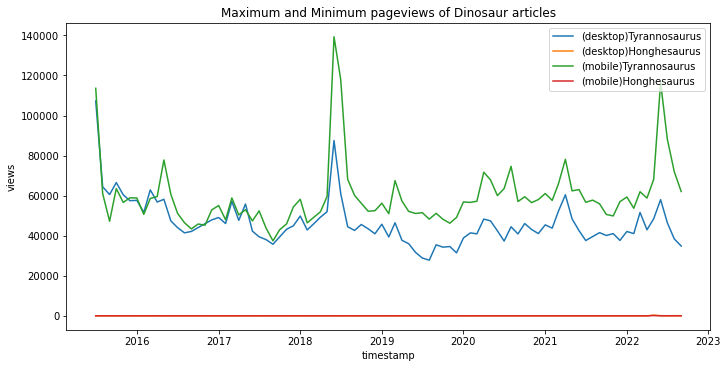

In [18]:
import matplotlib.pyplot as plt

# Plot max and min views for desktop and mobile
d_pageviews_df = desktop_pageviews_df[['article','timestamp','views']]
d_max_df = extract_article_df(d_pageviews_df, d_max)
d_min_df = extract_article_df(d_pageviews_df, d_min)

m_pageviews_df = mobile_pageviews_df[['article','timestamp','views']]
m_max_df = extract_article_df(m_pageviews_df, m_max)
m_min_df = extract_article_df(m_pageviews_df, m_min)

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.plot(d_max_df["views"], label='(desktop)' + d_max)
ax.plot(d_min_df["views"], label='(desktop)' + d_min)
ax.plot(m_max_df["views"], label='(mobile)' + m_max)
ax.plot(m_min_df["views"], label='(mobile)' + m_min)
ax.set_xlabel('timestamp')
ax.set_ylabel('views')
ax.set_title('Maximum and Minimum pageviews of Dinosaur articles')
ax.legend()

In [28]:
# Find top 10 views articles for desktop
d_top10 = desktop_pageviews_df.groupby(
    ['project', 'article', 'granularity', 'agent'],
    as_index=False
)['views'].aggregate('max')
d_top10 = d_top10.sort_values(by='views', ascending=False).iloc[:10]['article'].values
d_top10

array(['Achelousaurus', 'Velociraptor', 'Tyrannosaurus', 'Halszkaraptor',
       'Giganotosaurus', 'Spinosaurus', 'Lythronax', 'Nigersaurus',
       'Borealopelta', 'Dilophosaurus'], dtype=object)

In [29]:
# Find top 10 views articles for mobile
m_top10 = mobile_pageviews_df.groupby(
    ['project', 'article', 'granularity', 'agent'],
    as_index=False
)['views'].aggregate('max')
m_top10 = m_top10.sort_values(by='views', ascending=False).iloc[:10]['article'].values
m_top10

array(['Nigersaurus', 'Deinocheirus', 'Giganotosaurus', 'Therizinosaurus',
       'Velociraptor', 'Achelousaurus', 'Tyrannosaurus', 'Borealopelta',
       'Dilophosaurus', 'Argentinosaurus'], dtype=object)

C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].str.slice(0,8)
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].astype("datetime64")
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be s

C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].str.slice(0,8)
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].astype("datetime64")
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be s

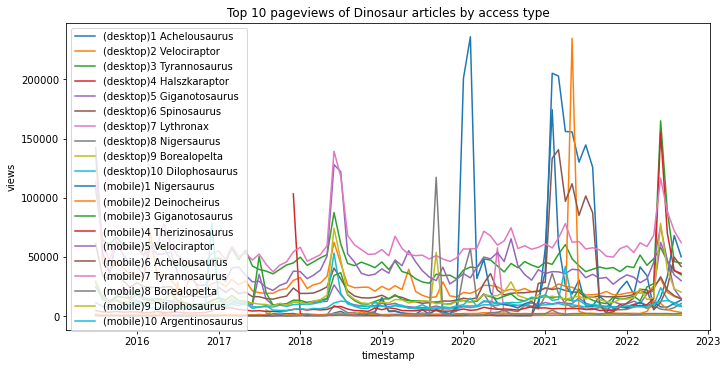

In [31]:
import matplotlib.pyplot as plt

# Plot top 10 views for desktop and mobile
d_pageviews_df = desktop_pageviews_df[['article','timestamp','views']]
d_top10_df = []
for d in d_top10:
    d_df = extract_article_df(d_pageviews_df, d)
    d_top10_df.append(d_df)

m_pageviews_df = mobile_pageviews_df[['article','timestamp','views']]
m_top10_df = []
for m in m_top10:
    m_df = extract_article_df(m_pageviews_df, m)
    m_top10_df.append(m_df)

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
i = 1
for d in d_top10_df:
    ax.plot(d["views"], label='(desktop)' + str(i) + ' ' + d_top10[i - 1])
    i = i + 1
j = 1
for m in m_top10_df:
    ax.plot(m["views"], label='(mobile)' + str(j) + ' ' + m_top10[j - 1])
    j = j + 1

ax.set_xlabel('timestamp')
ax.set_ylabel('views')
ax.set_title('Top 10 pageviews of Dinosaur articles by access type')
ax.legend()

In [36]:
# Find fewest 10 views articles for desktop
d_fewest10 = desktop_pageviews_df.groupby(
    ['project', 'article', 'granularity', 'agent'],
    as_index=False
)['views'].aggregate('count')
d_fewest10 = d_fewest10.sort_values(by='views', ascending=True).iloc[:10]['article'].values
d_fewest10

array(['Elemgasem', 'Tuebingosaurus', 'Jakapil', 'Perijasaurus',
       'Mbiresaurus', 'Bisticeratops', 'Iyuku', 'Paralitherizinosaurus',
       'Dzharaonyx', 'Bashanosaurus'], dtype=object)

In [37]:
# Find fewest 10 views articles for mobile
m_fewest10 = mobile_pageviews_df.groupby(
    ['project', 'article', 'granularity', 'agent'],
    as_index=False
)['views'].aggregate('count')
m_fewest10 = m_fewest10.sort_values(by='views', ascending=True).iloc[:10]['article'].values
m_fewest10

array(['Elemgasem', 'Tuebingosaurus', 'Jakapil', 'Perijasaurus',
       'Mbiresaurus', 'Bisticeratops', 'Iyuku', 'Paralitherizinosaurus',
       'Dzharaonyx', 'Bashanosaurus'], dtype=object)

C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].str.slice(0,8)
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].astype("datetime64")
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be s

C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].str.slice(0,8)
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_df["timestamp"] = article_df["timestamp"].astype("datetime64")
C:\Users\musomana.REDMOND\AppData\Local\Temp\ipykernel_62304\3194233252.py:3: SettingWithCopyWarning: 
A value is trying to be s

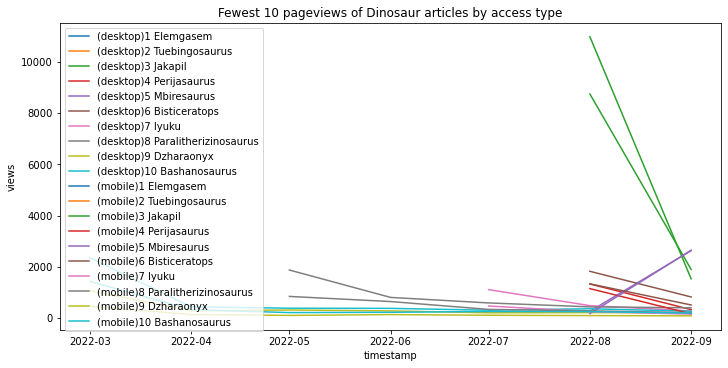

In [39]:
import matplotlib.pyplot as plt

# Plot fewest 10 views for desktop and mobile
d_pageviews_df = desktop_pageviews_df[['article','timestamp','views']]
d_fewest10_df = []
for d in d_fewest10:
    d_df = extract_article_df(d_pageviews_df, d)
    d_fewest10_df.append(d_df)

m_pageviews_df = mobile_pageviews_df[['article','timestamp','views']]
m_fewest10_df = []
for m in m_fewest10:
    m_df = extract_article_df(m_pageviews_df, m)
    m_fewest10_df.append(m_df)

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
i = 1
for d in d_fewest10_df:
    ax.plot(d["views"], label='(desktop)' + str(i) + ' ' + d_fewest10[i - 1])
    i = i + 1
j = 1
for m in m_fewest10_df:
    ax.plot(m["views"], label='(mobile)' + str(j) + ' ' + m_fewest10[j - 1])
    j = j + 1

ax.set_xlabel('timestamp')
ax.set_ylabel('views')
ax.set_title('Fewest 10 pageviews of Dinosaur articles by access type')
ax.legend()